# Task6: Predicting Real Estate House Prices

## This task is provided to test your understanding of building a Linear Regression model for a provided dataset

### Dataset: Real_estate.csv

### Import the necessary libraries
#### Hint: Also import seaborn

In [72]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

### Read the csv data into a pandas dataframe and display the first 5 samples

In [3]:
housing_data = pd.read_csv("./Real estate.csv")
housing_data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Show more information about the dataset

In [4]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


### Find how many samples are there and how many columns are there in the dataset

In [5]:
housing_data.shape

(414, 8)

### What are the features available in the dataset?

In [6]:
housing_data.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

### Check if any features have missing data

In [7]:
housing_data.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

### Group all the features as dependent features in X

In [10]:
X = housing_data.drop(["Y house price of unit area"], axis=1)
X

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067


### Group feature(s) as independent features in y

In [11]:
y = housing_data["Y house price of unit area"]
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

### Split the dataset into train and test data

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [34]:
print(X_train.shape, X_test.shape)

(393, 7) (21, 7)


### Choose the model (Linear Regression)

In [43]:
from sklearn.linear_model import LinearRegression

### Create an Estimator object

In [44]:
model = LinearRegression()

### Train the model

In [45]:
model.fit(X, y)

LinearRegression()

### Apply the model

In [38]:
model.predict(X_test)

array([47.34924152, 40.69815138, 43.34746698, 39.20678333, 27.05782984,
       45.50794239, 44.4831901 , 46.53168074, 24.0437536 , 54.76629818,
       34.13415415, 36.64381765, 37.02784194, 23.86067762, 35.51336144,
       33.53919606, 43.89609878, 45.21625484, 29.59936196, 44.70150697,
        1.57339504])

### Display the coefficients

In [39]:
model.coef_

array([-3.59350128e-03,  5.07908732e+00, -2.70841959e-01, -4.52079011e-03,
        1.12927749e+00,  2.24672892e+02, -1.44235635e+01])

### Find how well the trained model did with testing data

In [71]:
print("r2 Score : ", model.score(X_test, y_test))

r2 Score :  0.651929913254412


### Plot House Age Vs Price
#### Hint: Use regplot in sns

<Axes: xlabel='X2 house age', ylabel='Y house price of unit area'>

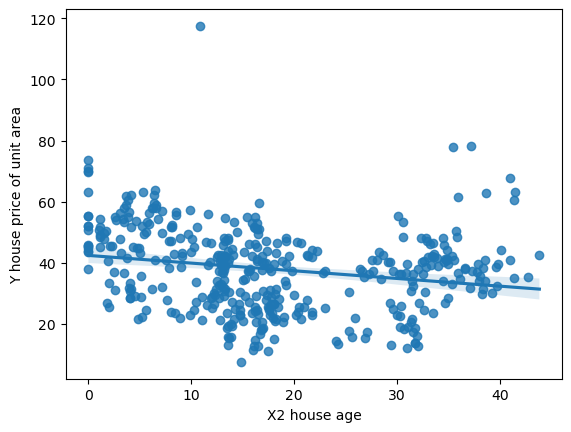

In [78]:
sns.regplot(x='X2 house age', y = 'Y house price of unit area', data = housing_data)

### Plot Distance to MRT station Vs Price

<Axes: xlabel='X3 distance to the nearest MRT station', ylabel='Y house price of unit area'>

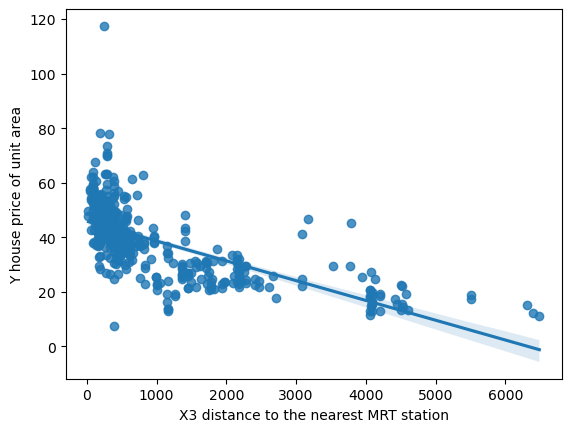

In [79]:
sns.regplot(x='X3 distance to the nearest MRT station', y = 'Y house price of unit area', data = housing_data)

### Plot Number of Convienience Stores Vs Price

<Axes: xlabel='X4 number of convenience stores', ylabel='Y house price of unit area'>

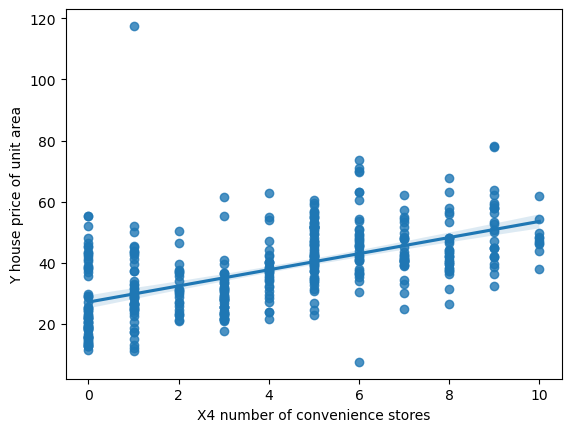

In [80]:
sns.regplot(x='X4 number of convenience stores', y = 'Y house price of unit area', data = housing_data)